# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : san patricio
Processing Record 2 of Set 1 : punta arenas
Processing Record 3 of Set 1 : kapaa
Processing Record 4 of Set 1 : port alfred
Processing Record 5 of Set 1 : jamestown
Processing Record 6 of Set 1 : asau
Processing Record 7 of Set 1 : berbera
Processing Record 8 of Set 1 : pangnirtung
Processing Record 9 of Set 1 : touros
Processing Record 10 of Set 1 : mbanza-ngungu
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : tasiilaq
Processing Record 13 of Set 1 : mataura
Processing Record 14 of Set 1 : hobart
Processing Record 15 of Set 1 : berezanka
Processing Record 16 of Set 1 : kodiak
Processing Record 17 of Set 1 : bambous virieux
Processing Record 18 of Set 1 : ust-ishim
Processing Record 19 of Set 1 : scharnstein
Processing Record 20 of Set 1 : atuona
Processing Record 21 of Set 1 : barrow
Processing Record 22 of Set 1 : ponta do sol
Processing Record 23 of Set 1 : bus

Processing Record 36 of Set 4 : broken hill
City not found. Skipping...
Processing Record 37 of Set 4 : beyneu
Processing Record 38 of Set 4 : wana
Processing Record 39 of Set 4 : camabatela
City not found. Skipping...
Processing Record 40 of Set 4 : meulaboh
Processing Record 41 of Set 4 : gamba
City not found. Skipping...
Processing Record 42 of Set 4 : kaitong
Processing Record 43 of Set 4 : vila franca do campo
Processing Record 44 of Set 4 : kavieng
Processing Record 45 of Set 4 : kamenskiy
Processing Record 46 of Set 4 : mchinji
City not found. Skipping...
Processing Record 47 of Set 4 : leeton
Processing Record 48 of Set 4 : sarkand
Processing Record 49 of Set 4 : port hawkesbury
Processing Record 50 of Set 4 : gunjur
Processing Record 0 of Set 5 : vao
Processing Record 1 of Set 5 : longyearbyen
Processing Record 2 of Set 5 : saint-philippe
Processing Record 3 of Set 5 : griffith
Processing Record 4 of Set 5 : bathsheba
Processing Record 5 of Set 5 : kaduna
Processing Record 6 o

Processing Record 23 of Set 8 : yerbogachen
Processing Record 24 of Set 8 : cartagena
Processing Record 25 of Set 8 : lorengau
Processing Record 26 of Set 8 : jingdezhen
Processing Record 27 of Set 8 : filadelfia
Processing Record 28 of Set 8 : kaele
Processing Record 29 of Set 8 : biloela
Processing Record 30 of Set 8 : sunrise manor
Processing Record 31 of Set 8 : west bay
Processing Record 32 of Set 8 : richards bay
Processing Record 33 of Set 8 : necochea
Processing Record 34 of Set 8 : salekhard
Processing Record 35 of Set 8 : pimentel
Processing Record 36 of Set 8 : assiniboia
Processing Record 37 of Set 8 : vangaindrano
Processing Record 38 of Set 8 : ambon
Processing Record 39 of Set 8 : general roca
Processing Record 40 of Set 8 : manzhouli
Processing Record 41 of Set 8 : bulgan
City not found. Skipping...
Processing Record 42 of Set 8 : sevilla
Processing Record 43 of Set 8 : aleksandrovsk-sakhalinskiy
Processing Record 44 of Set 8 : mayskiy
Processing Record 45 of Set 8 : ka

Processing Record 3 of Set 12 : nabire
Processing Record 4 of Set 12 : mozhga
Processing Record 5 of Set 12 : avera
City not found. Skipping...
Processing Record 6 of Set 12 : resistencia
Processing Record 7 of Set 12 : ahuimanu
Processing Record 8 of Set 12 : egvekinot
Processing Record 9 of Set 12 : ankazoabo
Processing Record 10 of Set 12 : fort dodge
Processing Record 11 of Set 12 : rovaniemi
Processing Record 12 of Set 12 : antofagasta
Processing Record 13 of Set 12 : anadyr
Processing Record 14 of Set 12 : kebomas
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [6]:
weather_df.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Patricio,75,MX,1595985868,74,19.22,-104.70,87.80,11.41
1,Punta Arenas,81,CL,1595985783,86,-53.15,-70.92,37.40,13.87
2,Kapaa,90,US,1595985860,78,22.08,-159.32,80.60,14.99
3,Port Alfred,0,ZA,1595985866,81,-33.59,26.89,58.03,12.15
4,Jamestown,1,US,1595985757,56,42.10,-79.24,73.40,6.93
...,...,...,...,...,...,...,...,...,...
570,Fort Dodge,1,US,1595986094,65,42.50,-94.17,80.60,6.93
571,Rovaniemi,100,FI,1595986094,77,66.50,25.72,59.00,9.17
572,Antofagasta,9,CL,1595986094,81,-23.65,-70.40,53.60,3.36
573,Anadyr,75,RU,1595985859,76,64.75,177.48,57.20,13.42


In [8]:
# Export the city data into a .csv.
weather_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df['Humidity'].max()

100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

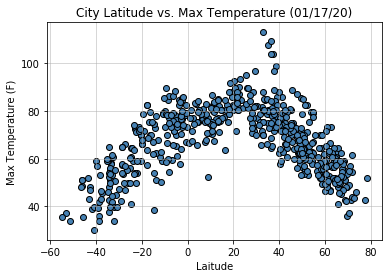

In [10]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

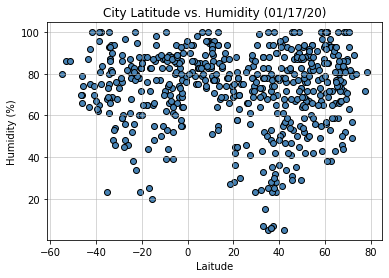

In [11]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

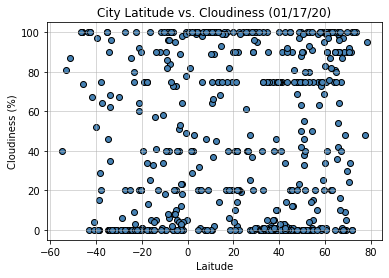

In [12]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

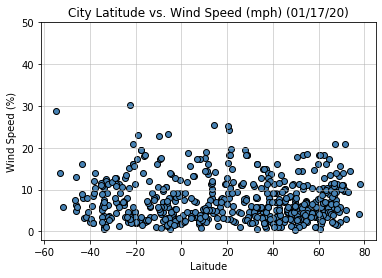

In [13]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression